# Mathematics for Machine Learning

## Session 18: Differentiation (cont.)

### Gerhard Jäger


January 7, 2025

---
<br><br>

<small>Most material taken from Chapter 2 of Keisler, H. Jerome. *Elementary Calculus: An Infinitesimal Approach*. 2012.</small><br>
<small>Applets programmed with the help of ChatGPT</small>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact


## Remark on notation

In analysis, there are three conventions in use to denote functions:

1. **named functions** 
    - e.g. $f(x) = x^2; g(y) = a-y$
2. **unnamed functions**
    - e.g. $(3x+5)^2$, $\frac{y+1}{y-1}$
3. **fresh variables**
    - e.g. $y = x^2; z = \frac{y+1}{y-1}$
    
Unfortunately, in the unnamed function and the variable notation, it is not explicitly specified what the independent variable is. This has to be inferred from the context.

Also, be aware that the first two notations are ambiguous if used with generic fresh variable names. $f(x)$ can denote the function $f$, or the value of $f$ when applied to some fixed value $x$. 

When the argument of $f$ is not a generic variable, only the latter interpretation is possible. $f(1)$ or $f(x_0)$, e.g., refer the function values.

The same applies for unnamed functions. $\frac{y+1}{y-1}$ can refer to a function, and $y$ is just a place-holder variable, or it can refer to the evaluation of this term for a specific value of $y$.




This mess carries over to derivatives.

- For named functions, the derivative can be written with the prime-notation:
    - $f'(x), g'(y), \ldots$
  Here, $f'$ is the name of a function (the derivative of $f$), and $f'(x)$ can either be that function or the value of that function for the argument $x$.  
- For the derivative of unnamed function, the Leibniz notation is used

$$
\begin{align}
\frac{d}{dx} (3x+5)^2\\
\frac{d}{dy} \frac{y+1}{y-1}\\
\vdots
\end{align}
$$
These term unambiguously denote a function. To refer to the value of this function at a particular value, a new notation is used:
$$
\begin{align}
\left.\frac{d}{dx} (3x+5)^2\right|_{x=2}\\
\left.\frac{d}{dy} \frac{y+1}{y-1}\right|_{y=0}\\
\vdots
\end{align}
$$

*Variables-as-functions* are treated the same way as unnamed functions.

If $y$ is a function with $x$ as independent variable,
- the derivative of this function is written like $\frac{dy}{dx}$ or $\frac{d}{dx}y$, and
- the derivative at a specific value for $x$ is written like $\left.\frac{dy}{dx}\right|_{x=2}$


(Mathematicians are lazy. No programmer would get away with this kind of sloppiness.)

**THEOREM (Constant Functions)**

Suppose the function $f$ is constant:
$$
\forall x. f(x) = c
$$
Then 
$$
\forall x.f'(x) = 0
$$

**PROOF**

$$
\begin{align}
f(x+\Delta x) - f(x) &= c - c\\
&= 0
\end{align}
$$



**THEOREM (Product Rule)**

Suppose $u$ and $v$ depend on $x$. Then for any value of $x$ where $\frac{du}{dx}$ and $\frac{dv}{dx}$ exist:

$$
\frac{d(uv)}{dx} = u \frac{dv}{dx} + v \frac{du}{dx}, \quad d(uv) = u \, dv + v \, du.
$$





**PROOF**  
Let $y = uv$, and let $\Delta x \neq 0$ be infinitesimal. Then:

$$
y + \Delta y = (u + \Delta u)(v + \Delta v),
$$

$$
\Delta y = (u + \Delta u)(v + \Delta v) - uv = u \Delta v + v \Delta u + \Delta u \Delta v,
$$

$$
\frac{\Delta y}{\Delta x} = \frac{u \Delta v + v \Delta u + \Delta u \Delta v}{\Delta x} = u \frac{\Delta v}{\Delta x} + v \frac{\Delta u}{\Delta x} + \frac{\Delta u \Delta v}{\Delta x}.
$$

$\Delta u$ is infinitesimal by the Increment Theorem, whence:

$$
\text{st}\left(\frac{\Delta y}{\Delta x}\right) = \text{st}\left(u \frac{\Delta v}{\Delta x} + v \frac{\Delta u}{\Delta x} + \frac{\Delta u \Delta v}{\Delta x}\right),
$$

$$
= u \cdot \text{st}\left(\frac{\Delta v}{\Delta x}\right) + v \cdot \text{st}\left(\frac{\Delta u}{\Delta x}\right) + 0 \cdot \text{st}\left(\frac{\Delta u}{\Delta x}\right).
$$

Thus:

$$
\frac{dy}{dx} = u \frac{dv}{dx} + v \frac{du}{dx}.
$$


## Example: $y = x^4$

We can find the result by using $\frac{dx^2}{dx} = 2x$ and the product rule.

$$
\begin{align}
\frac{dx^4}{dx} &= \frac{d(x^2 \times x^2)}{dx}\\
&= x^2\frac{dx^2}{dx} + x^2\frac{dx^2}{dx}\\
&= 2(x^2\frac{dx^2}{dx})\\
&= 2(x^2 \times 2x)\\
&= 4x^3
\end{align}
$$

# Generalization: $y = x^n$ for positive integers $n$

From the examples we have seen $(x^2, x^3, x^4)$, it seems there is a general rule

$$
\frac{dx^n}{dx} = nx^{n-1}
$$

Let's prove this. We will do this via **induction**.

## PRINCIPLE OF INDUCTION

*Suppose a statement P(n) about an arbitrary integer n is true when n = 1. Suppose further that for any positive integer m such that P(m) is true, P(m + 1) is also true. Then the statement P(n) is true of every positive integer n.*


- $n=1$

$$
\begin{align}
\frac{dx^1}{dx} &= 1 \\
&= 1x^0
\end{align}
$$

- $n>1$

    Suppose it holds that $\frac{dx^n}{dx} = nx^{n-1}$. We have to show that the law also holds for $n+1$, i.e., that $\frac{dx^{n+1}}{dx} = (n+1)x^n$.
    
    $$
    \begin{align}
    \frac{dx^{n+1}}{dx} &= \frac{d(x\times x^{n})}{dx}\\
    &= x\times nx^{n-1} + x^n & \text{(product rule)}\\
    &= nx^n + x^n\\
    &= (n+1)x^n
    \end{align}
    $$

**THEOREM (Quotient Rule)**

Suppose $u, v$ depend on $x$. Then for any value of $x$ where $\frac{du}{dx}$, $\frac{dv}{dx}$ exist and $v \neq 0$:

$$
\frac{d\left(\frac{u}{v}\right)}{dx} = \frac{v \frac{du}{dx} - u \frac{dv}{dx}}{v^2}, \quad d\left(\frac{u}{v}\right) = \frac{v \, du - u \, dv}{v^2}.
$$




**PROOF**  

$$
\begin{align}
y &= \frac{u}{v}\\
y + \Delta y &= \frac{u+\Delta u}{v+\Delta v}\\
\Delta y &= \frac{u+\Delta u}{v+\Delta v} - \frac{u}{v}\\
&= \frac{v(u+\Delta u) - u(v+\Delta v)}{v(v+\Delta v)}\\
&= \frac{uv+v\Delta u - uv - u \Delta v}{v^2+v\Delta v}\\
&= \frac{v\Delta u  - u \Delta v}{v^2+v\Delta v}\\
\frac{\Delta y}{\Delta x} &= \frac{v\frac{\Delta u}{\Delta x}  - u \frac{\Delta v}{\Delta x}}{v^2+v\Delta v}\\
\frac{dy}{dx} &= st\frac{\Delta y}{\Delta x}\\
&= st\frac{v\frac{\Delta u}{\Delta x}  - u \frac{\Delta v}{\Delta x}}{v^2+v\Delta v}\\
&= \frac{v\frac{d u}{d x}  - u \frac{d v}{d x}}{v^2}\\
\end{align}
$$

### Examples

$$
\begin{align}
f(x) &= 3x^2 + 5x - 4
\end{align}
$$

$$
\begin{align}
f'(x) &= \frac{d}{dx} (3x^2 + 5x - 4)\\
&= \frac{d}{dx} (3x^2) + \frac{d}{dx}(5x) - \frac{d}{dx}4\\
&= 3\frac{d}{dx} x^2 + 5\frac{d}{dx}x - \frac{d}{dx}4\\
&= 3\times 2x + 5\times 1-0\\
&=6x+5
\end{align}
$$

$$
f(x) = \frac{1}{\sqrt x}
$$

$$
\begin{align}
f'(x) &= \frac{\frac{d}{dx}1\times \sqrt{x}- 1\times \frac{d}{dx}\sqrt{x}}{(\sqrt{x})^2}\\
&=\frac{\frac{d}{dx}1\times \sqrt{x}- 1\times \frac{d}{dx}\sqrt{x}}{x}\\
&=\frac{0\times \sqrt{x}- 1\times \frac{d}{dx}\sqrt{x}}{x}\\
&=\frac{- \frac{d}{dx}\sqrt{x}}{x}\\
&=\frac{- \frac{1}{2\sqrt{x}}}{x}\\
&= -\frac{1}{2x\sqrt{x}}
\end{align}
$$

Suppose $f$ and $g$ are two functions that differ only by a constant:

$$
f(x) = g(x) + c
$$

How are $f'(x)$ and $g'(x)$ related?

$$
\begin{align}
f'(x) &= \frac{d}{dx}(g(x) + c)\\
&= \frac{d}{dx}g(x) + \frac{d}{dx} c\\
&=g'(x) + 0\\
&= g'(x)
\end{align}
$$

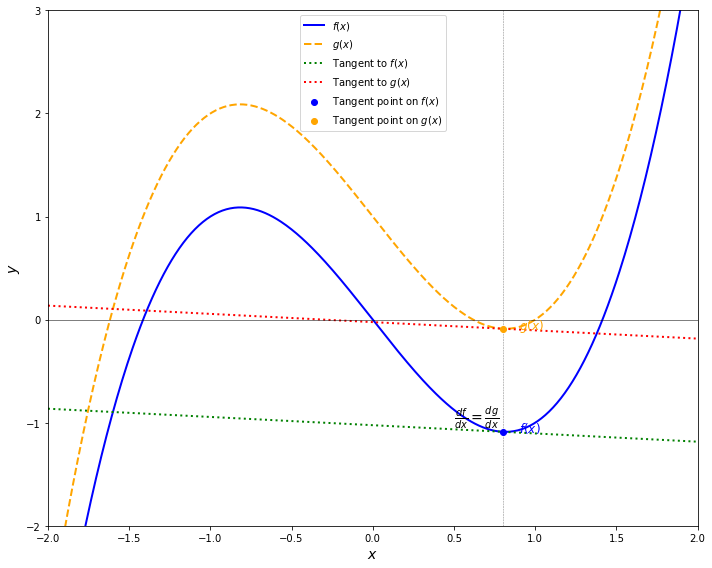

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Define the x values
x = np.linspace(-2, 2, 500)

# Define the cubic functions for f(x) and g(x)
f = x**3 - 2*x  # Cubic function for f(x)
c = 1           # Constant shift
g = f + c       # Cubic function for g(x)

# Derivative of f(x)
tangent_point = 0.8
df_dx = 3 * tangent_point**2 - 2  # Derivative of f(x) at x=tangent_point

# Tangent lines
tangent_line_f = df_dx * (x - tangent_point) + (tangent_point**3 - 2 * tangent_point)
tangent_line_g = tangent_line_f + c

# Plot the updated curves and tangents with color
plt.figure(figsize=(10, 8))  # Increase the figure size
plt.plot(x, f, label='$f(x)$', color='blue', linewidth=2)
plt.plot(x, g, label='$g(x)$', color='orange', linestyle='--', linewidth=2)
plt.plot(x, tangent_line_f, color='green', linestyle=':', label='Tangent to $f(x)$', linewidth=2)
plt.plot(x, tangent_line_g, color='red', linestyle=':', label='Tangent to $g(x)$', linewidth=2)

# Mark tangent points
plt.scatter([tangent_point], [tangent_point**3 - 2 * tangent_point], color='blue', zorder=5, label='Tangent point on $f(x)$')
plt.scatter([tangent_point], [tangent_point**3 - 2 * tangent_point + c], color='orange', zorder=5, label='Tangent point on $g(x)$')

# Add labels
plt.text(tangent_point + 0.1, tangent_point**3 - 2 * tangent_point, "$f(x)$", fontsize=12, color='blue')
plt.text(tangent_point + 0.1, tangent_point**3 - 2 * tangent_point + c, "$g(x)$", fontsize=12, color='orange')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)  # Rename the vertical axis to y
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(tangent_point, color='gray', linestyle='--', linewidth=0.5)
plt.grid(False)

# Add formula
plt.text(0.5, -1, r'$\frac{df}{dx} = \frac{dg}{dx}$', fontsize=14)

# Set axis limits
plt.xlim(-2, 2)
plt.ylim(-2, 3)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


**THEOREM (Chain Rule)**

Suppose $u$ depends on $v$, and $v$ depends on $x$. Then for any value of $x$ where $\frac{du}{dv}$ and $\frac{dv}{dx}$ exist:


$$
\begin{align}
y &= u(v(x))\\
\frac{dy}{dx} &= \frac{du}{dv}\frac{dv}{dx} 
\end{align}
$$





**PROOF**


According to the Increment Theorem:
$$
v(x+\Delta x) = v(x) + \frac{dv}{dx}\Delta x + \varepsilon \Delta x
$$
for some infinitesimal $\varepsilon$. Therefore
$$
\begin{align}
y + \Delta y &= u(v(x) + \frac{dv}{dx}\Delta x + \varepsilon\Delta x)
\end{align}
$$
The Increment Theorem also entails that for each infinitesimal $\Delta z$:
$$
u(z + \Delta z) = u(z) + \frac{du}{dz}\Delta z + \delta \Delta z
$$
for some infinitesimal $\delta$. If we let $z = v(x)$ and $\Delta z=\frac{dv}{dx}\Delta x + \varepsilon\Delta x$ , we get
$$
\begin{align}
y + \Delta y &= u(v(x)) + \frac{du}{dz}(\frac{dv}{dx}\Delta x + \varepsilon\Delta x) + \delta (\frac{dv}{dx}\Delta x + \varepsilon\Delta x)\\
\Delta y &= \frac{du}{dv}(\frac{dv}{dx}\Delta x + \varepsilon\Delta x) + \delta (\frac{dv}{dx}\Delta x + \varepsilon\Delta x)\\
\frac{\Delta y}{\Delta x} &= \frac{du}{dv}(\frac{dv}{dx} + \varepsilon) + \delta (\frac{dv}{dx} + \varepsilon)\\
\frac{dy}{dx} &=st\frac{\Delta y}{\Delta x}\\
&= st(\frac{du}{dv}(\frac{dv}{dx} + \varepsilon) + \delta (\frac{dv}{dx} + \varepsilon))\\
&= \frac{du}{dv}\frac{dv}{dx}
\end{align}
$$




### Examples

$$
y = (x+8)^5
$$

$$
\begin{align}
z &= x+8\\
y &= z^5\\
\frac{dy}{dx} &= \frac{dy}{dz}\frac{dz}{dx}\\
&=\frac{d}{dz}z^5 \times \frac{d}{dx}(x+8)\\
&= 5z^4 \times 1\\
&= 5z^4\\
&=5(x+8)^4
\end{align}
$$

$$
g(x) = 3(2-5x)^6
$$

$$
\begin{align}
y &= 2-5x\\
z &= y^6\\
u &= 3z\\
g(x) &= u\\
\frac{dy}{dx} &= -5\\
\frac{dz}{dy} &= 6y^5\\
\frac{dz}{dx} &= \frac{dz}{dy}\frac{dy}{dx}\\
&=-5\times 6y^5\\
&=-30y^5\\
&=-30(2-5x)^5\\
\frac{du}{dz} &= 3\\
\frac{du}{dx} &= \frac{du}{dz} \frac{dz}{dx}\\
&=-90(2-5x)^5
\end{align}
$$

$$
u = \frac{x}{x^2+1}
$$

$$
\begin{align}
\frac{du}{dx} &= \frac{\frac{dx}{dx}(x^2+1) - x\frac{d}{dx}(x^2+1)}{(x^2+1)^2}\\
&=\frac{x^2+1 - x\frac{d}{dx}(x^2+1)}{(x^2+1)^2}\\
&=\frac{x^2+1 - x(2x)}{(x^2+1)^2}\\
&=\frac{x^2+1 - 2x^2}{(x^2+1)^2}\\
&=\frac{1 - x^2}{(x^2+1)^2}\\
\end{align}
$$

$$
y = \frac{x+1}{x-1}
$$

$$
\begin{align}
\frac{dy}{dx} &= \frac{\frac{d}{dx}(x+1)(x-1) -(x+1)\frac{d}{dx}(x-1) }{(x-1)^2}\\
&= \frac{(x-1) -(x+1)\frac{d}{dx}(x-1) }{(x-1)^2}\\
&= \frac{(x-1) -(x+1) }{(x-1)^2}\\
&= -\frac{2}{(x-1)^2}\\
\end{align}
$$



## Inverse functions

**THEOREM**

Let $f$ be differentiable at $x$. Then $f$ is continuous at $x$.

**PROOF**

Let $\varepsilon$ be infinitesimal. According to the Increment Theorem, there is an infinitesimal $\delta$ such that
$$
f(x+\varepsilon) = f(x)+f'(x)\varepsilon + \delta\varepsilon
$$
Hence $f(x+\varepsilon)\approx f(x)$. 



**THEOREM**

Let $f$ be a real 1-1 function that is continuous in the interval $(a,b)$, and let $x, y \in (a,b)$. Furthermore, let $f(x)\approx f(y)$. Then $x\approx y$.

**PROOF**

By continuity, 
$$
\begin{align}
f(st(x)) &\approx f(x)\\
f(st(y)) & \approx f(y)
\end{align}
$$
Therefore
$$
f(st(x)) \approx f(st(y))
$$
Since $f(st(x)), f(st(y))$ must be real, it follows that
$$
f(st(x)) = f(st(y))
$$
Because $f$ is 1-1, $st(x)=st(y)$, hence $x\approx y$.





## Inverse functions



**THEOREM**

Let $f$ be a real 1-1 function that is differentiable in the interval $(a, b)$. Then $f^{-1}$ is differentiable in the range of $f$, and
$$
\frac{d f^{-1}(x)}{dx} = \frac{1}{f'(f^{-1}(x))}
$$
**PROOF**
$$
\begin{align}
\Delta y &= f^{-1}(x+\Delta x) - f^{-1}(x)
\end{align}
$$
I assume here without proof that $f^{-1}(x)\approx f^{-1}(y)$ entails that $x\approx y$. (This follows from the fact that $f$ is differentiable and 1-1, but I will not spell this out here.)


Therefore, $\Delta y$ must be infinitesimal.


$$
\begin{align}
f^{-1}(x) + \Delta y &= f^{-1}(x+\Delta x)\\
f(f^{-1}(x) + \Delta y) &= x+\Delta x
\end{align}
$$


Since $\Delta y$ is infinitesimal and $f$ is differentiable, it follows by the Increment Theorem that there is an infinitesimal $\varepsilon$ such that

$$
\begin{align}
f(f^{-1}(x)+\Delta y) &= x+f'(f^{-1}(x))\Delta y + \varepsilon\Delta y
\end{align}
$$

Putting things together, we have

$$
\begin{align}
x+f'(f^{-1}(x))\Delta y + \varepsilon\Delta y &= x + \Delta x\\
f'(f^{-1}(x))\Delta y + \varepsilon\Delta y &= \Delta x\\
\Delta y &= \frac{\Delta x}{f'(f^{-1}(x))+\varepsilon}\\
\frac{\Delta y}{\Delta x} &=\frac{1}{f'(f^{-1}(x))+\varepsilon}\\
\frac{dy}{dx} &=\frac{1}{f'(f^{-1}(x))}\\
\end{align}
$$


## Examples

$$
f(x) = \sqrt[3]{x}
$$



$$
\begin{align}
f^{-1}(y) &= y^3 & (y> 0)\\
f'(x) &= \frac{1}{\left.\frac{d}{dy}(y^3)\right|_{\sqrt[3]x}}\\
&= \frac{1}{3(\sqrt[3]x)^2}\\
&= \frac{1}{3} x^{-\frac{2}{3}}
\end{align}
$$